# Algorithm Comparison (40%)
### ✅ Visualizations (20%)
Apply DBSCAN, k-Means, and Hierarchical Clustering to at least two different datasets and
present results using clearly labeled plots:
- Dataset where DBSCAN excels (e.g., non-spherical clusters, datasets with noise).
- Dataset where DBSCAN struggles (e.g., varying densities, difficulty tuning eps).

#### Dataset Selection (Using sklearn Datasets)
To ensure consistency, you may use datasets from sklearn.datasets such as:
- make_moons(n_samples=300, noise=0.05) → Good for DBSCAN (non-spherical
clusters).
-  make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])
    - → Shows DBSCAN struggles with varying densities.
-  make_circles(n_samples=300, factor=0.5, noise=0.05) 
    - → Highlights DBSCAN's ability to handle non-linearly separable data.

Ensure plots are easy to interpret with appropriate axis labels, legends, and titles.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as skd 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

def plot_clustering_results(X, labels, centers, silhouette_avg, n_clusters=4, title = 'Clustering Result'):
    """
    Plots the clustering results and the silhouette scores for each sample.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input data points.
    labels : array-like, shape (n_samples,)
        The cluster labels for each data point.
    centers : array-like, shape (n_clusters, n_features), optional
        The coordinates of the cluster centers. If None, no centers are plotted.
    silhouette_avg : float
        The average silhouette score for all the samples.
    n_clusters : int, optional, default=4
        The number of clusters.

    Returns:
    None
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # Plot the clustering result
    ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    if centers is not None:
        ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title(title)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax2.set_yticks([])
    ax2.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k-Means silhouette Score: 0.4918873632805391


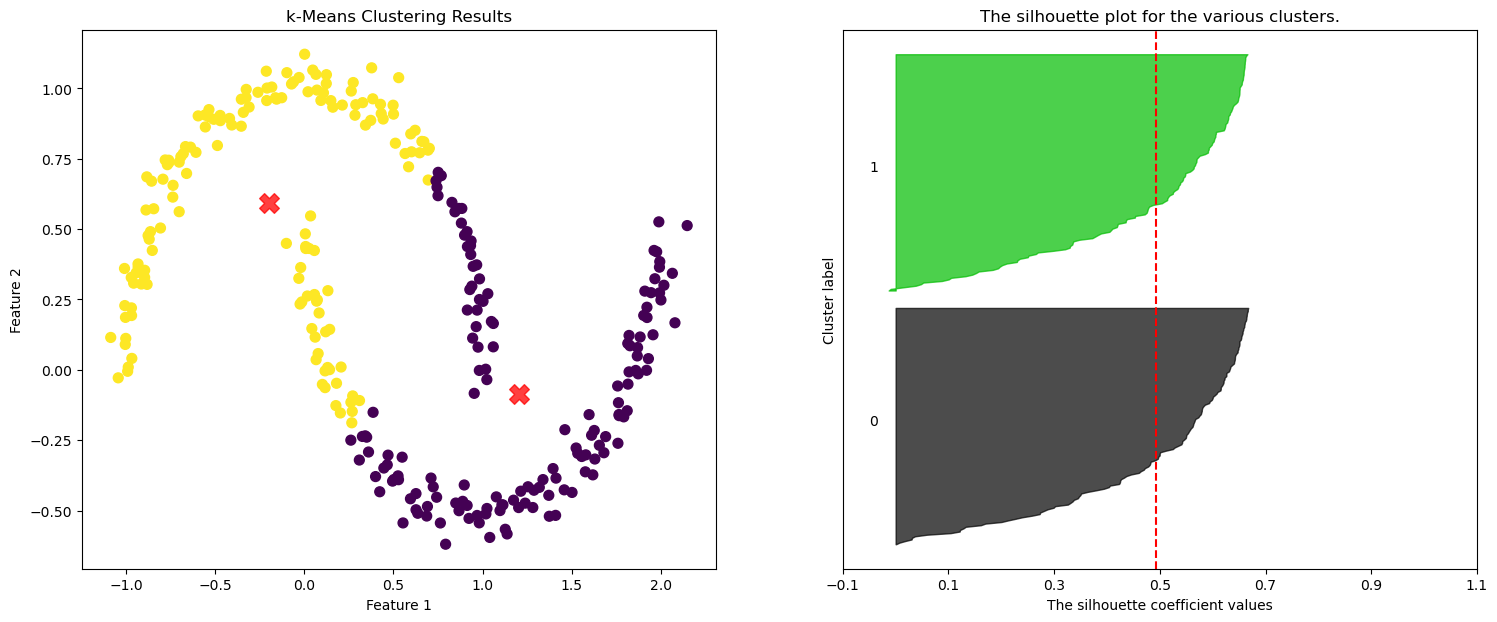

Agglomerative clustering silhouette Score: 0.4390280651177801


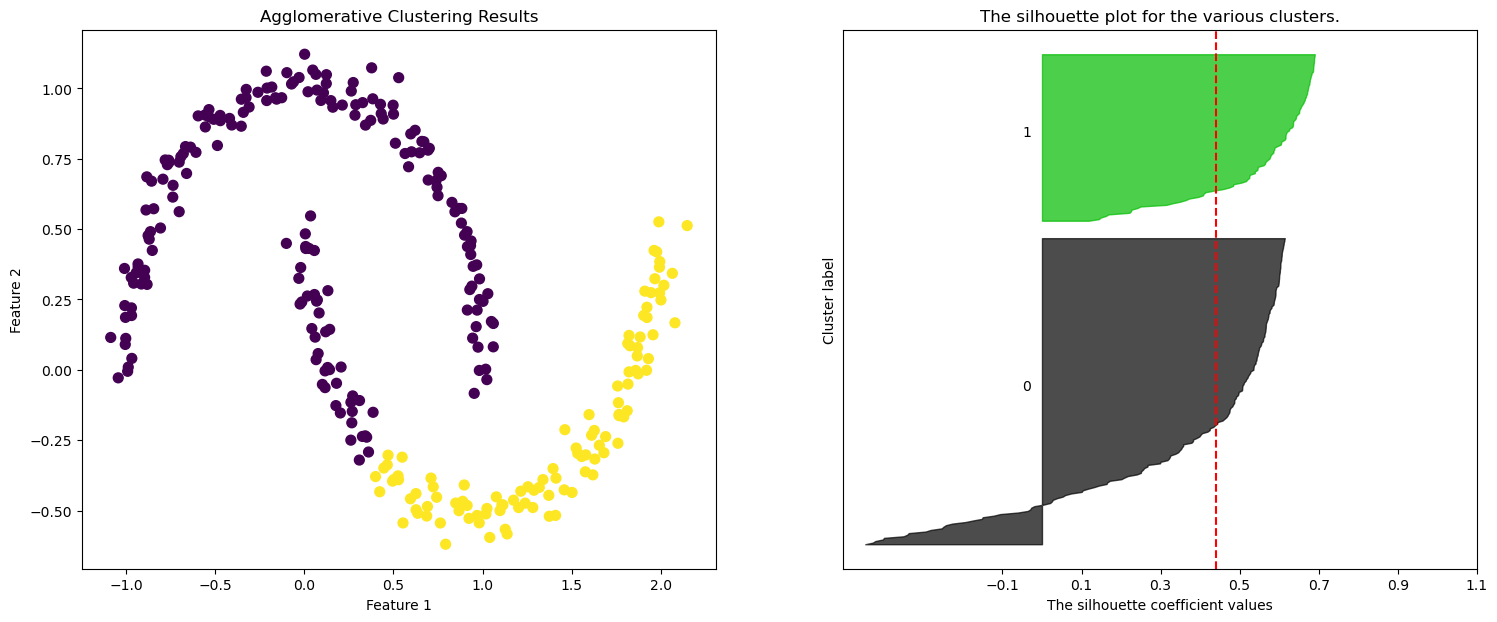

Number of clusters + noise: (2, 0)
DBSCAN silhouette score: 0.3290940121254042


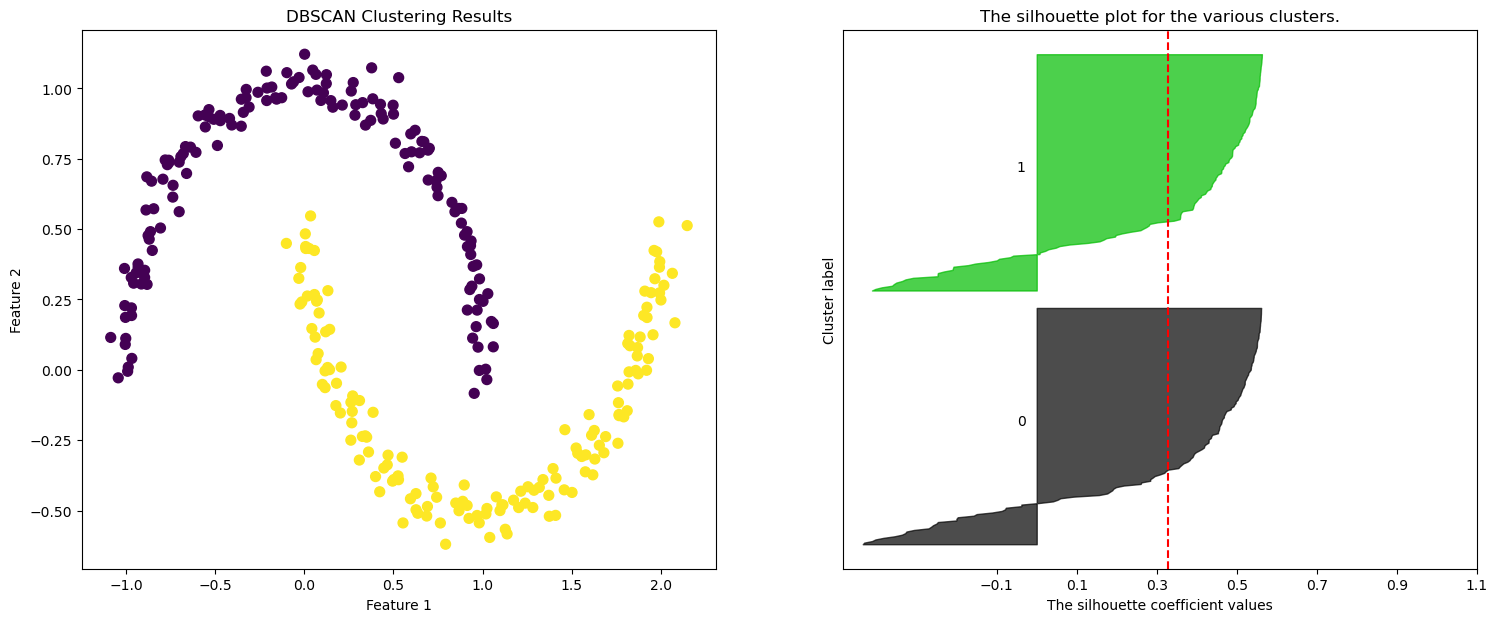

In [5]:
X_moon, y_moon = skd.make_moons(n_samples=300, noise=0.05) 
# → Good for DBSCAN (non-spherical clusters).

# k-Means INITIALISE, FIT, PREDICT ==================
kmeans = KMeans(n_clusters=2, max_iter=14, random_state=42)
kmeans.fit(X_moon)
y_moon_kmeans = kmeans.predict(X_moon)
# Evaluate the model
silhouette_kmeans_avg = silhouette_score(X_moon, y_moon_kmeans)
print(f"k-Means silhouette Score: {silhouette_kmeans_avg}")

# Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
plot_clustering_results(X_moon, y_moon_kmeans, centers, silhouette_kmeans_avg, n_clusters=2, title = 'k-Means Clustering Results')


# Agglomerative =======================================

#  INITIALISE, FIT, PREDICT
agg_clustering = AgglomerativeClustering(n_clusters=2)
y_agg = agg_clustering.fit_predict(X_moon)
# Evaluate the model
silhouette_agg_avg = silhouette_score(X_moon, y_agg)
print(f"Agglomerative clustering silhouette Score: {silhouette_agg_avg}")

# Plot the clustering results using the custom function
plot_clustering_results(X_moon, y_agg, None, silhouette_agg_avg, n_clusters=2,  title = 'Agglomerative Clustering Results')

# DBSCAN  ===========================================
dbscan = DBSCAN(eps=0.2, min_samples=6)
y_dbs = dbscan.fit_predict(X_moon)
labels=dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


silhouette_dbs_avg = silhouette_score(X_moon, y_dbs)
print(f"Number of clusters + noise: {n_clusters_, n_noise_}")
print(f"DBSCAN silhouette score: {silhouette_dbs_avg}")

plot_clustering_results(X_moon, y_dbs, None, silhouette_dbs_avg, n_clusters = n_clusters_,  title = 'DBSCAN Clustering Results')

c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k-Means silhouette Score: 0.6853947374307946


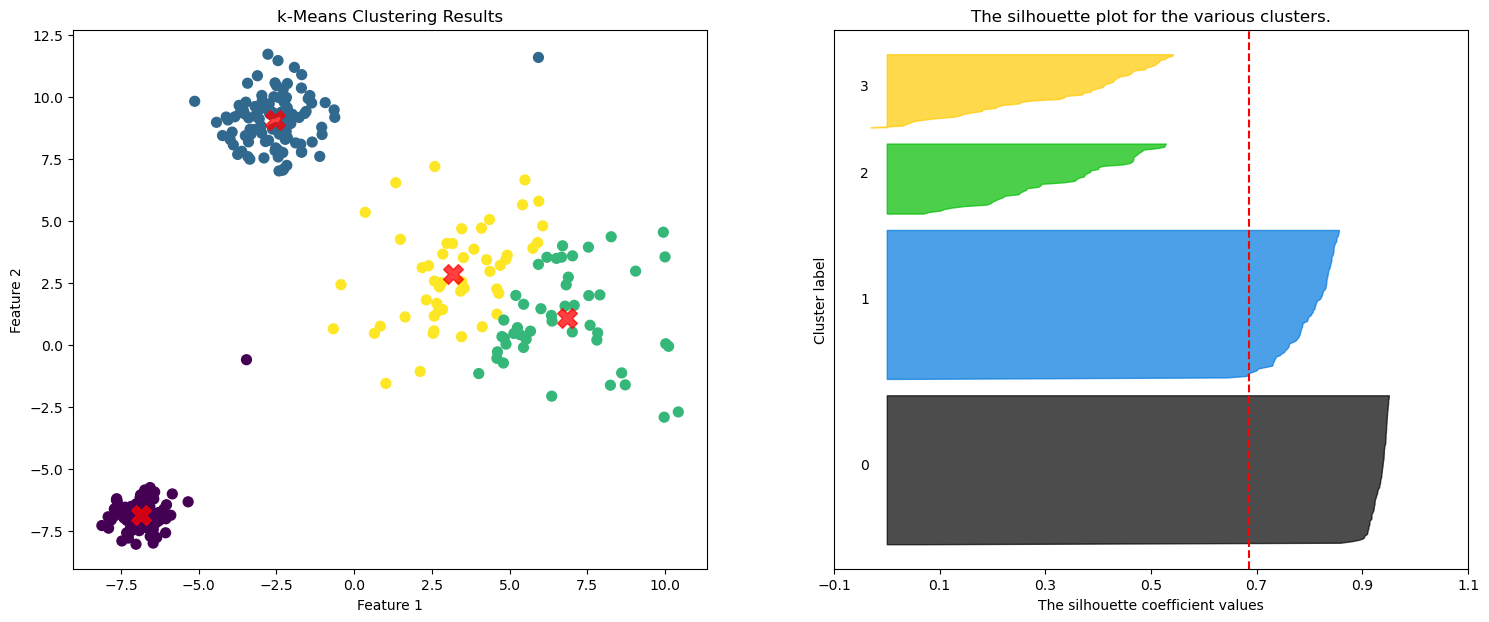

Agglomerative clustering silhouette Score: 0.6803829584887975


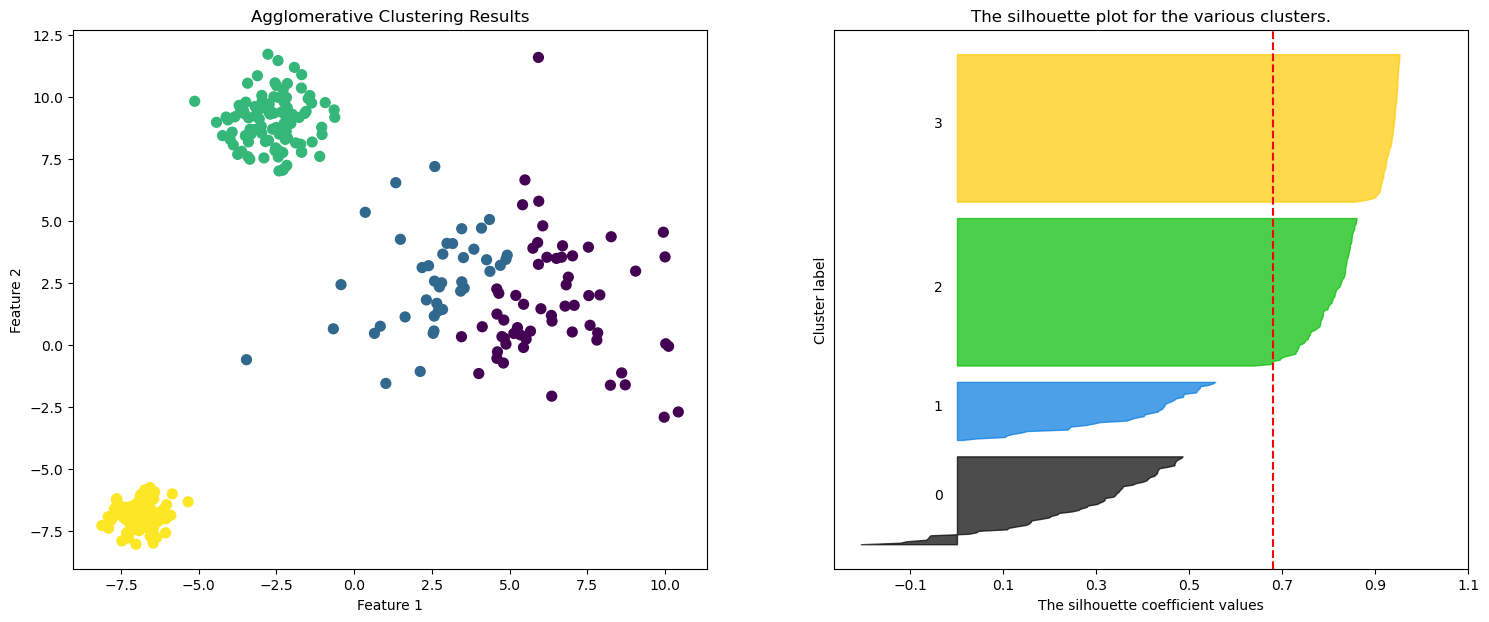

Number of clusters: 5, noise points: 70, parameters: DBSCAN(eps=0.9, min_samples=9)
DBSCAN silhouette score: 0.5275474799303947


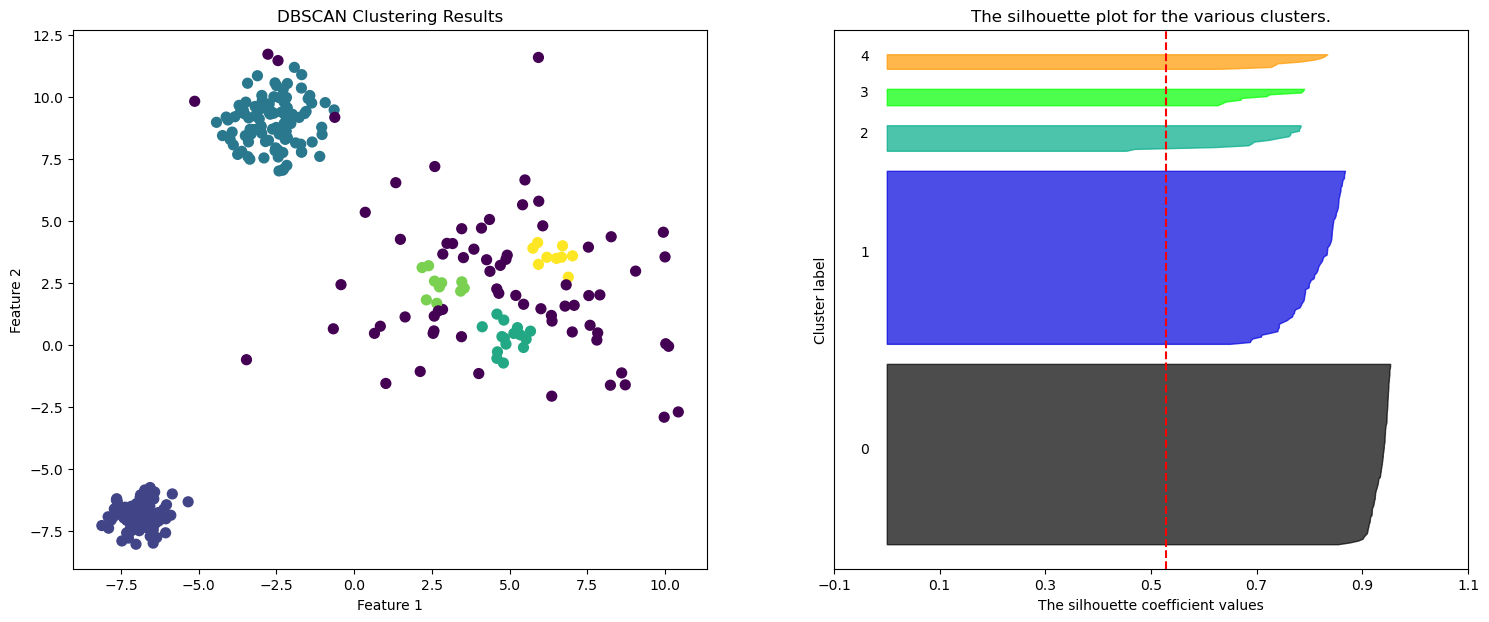

In [6]:
X_blob, y_blob = skd.make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
# → Shows DBSCAN struggles with varying densities.

# k-Means INITIALISE, FIT, PREDICT ==================
kmeans = KMeans(n_clusters=4, max_iter=14)
kmeans.fit(X_blob)
y_blob_kmeans = kmeans.predict(X_blob)
# Evaluate the model
silhouette_kmeans_avg = silhouette_score(X_blob, y_blob_kmeans)
print(f"k-Means silhouette Score: {silhouette_kmeans_avg}")

# Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
plot_clustering_results(X_blob, y_blob_kmeans, centers, silhouette_kmeans_avg, n_clusters=4,  title = 'k-Means Clustering Results')

# Agglomerative =======================================

#  INITIALISE, FIT, PREDICT
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X_blob)
# Evaluate the model
silhouette_agg_avg = silhouette_score(X_blob, y_agg)
print(f"Agglomerative clustering silhouette Score: {silhouette_agg_avg}")

# Plot the clustering results using the custom function
plot_clustering_results(X_blob, y_agg, None, silhouette_agg_avg, n_clusters=4,  title = 'Agglomerative Clustering Results')

# DBSCAN  ===========================================
dbscan = DBSCAN(eps=0.9, min_samples=9)
y_dbs = dbscan.fit_predict(X_blob)
labels=dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


silhouette_dbs_avg = silhouette_score(X_blob, y_dbs)
print(f"Number of clusters: {n_clusters_}, noise points: {n_noise_}, parameters: {dbscan}")
print(f"DBSCAN silhouette score: {silhouette_dbs_avg}")

plot_clustering_results(X_blob, y_dbs, None, silhouette_dbs_avg, n_clusters = n_clusters_,  title = 'DBSCAN Clustering Results')


c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k-Means silhouette Score: 0.36789516245033144


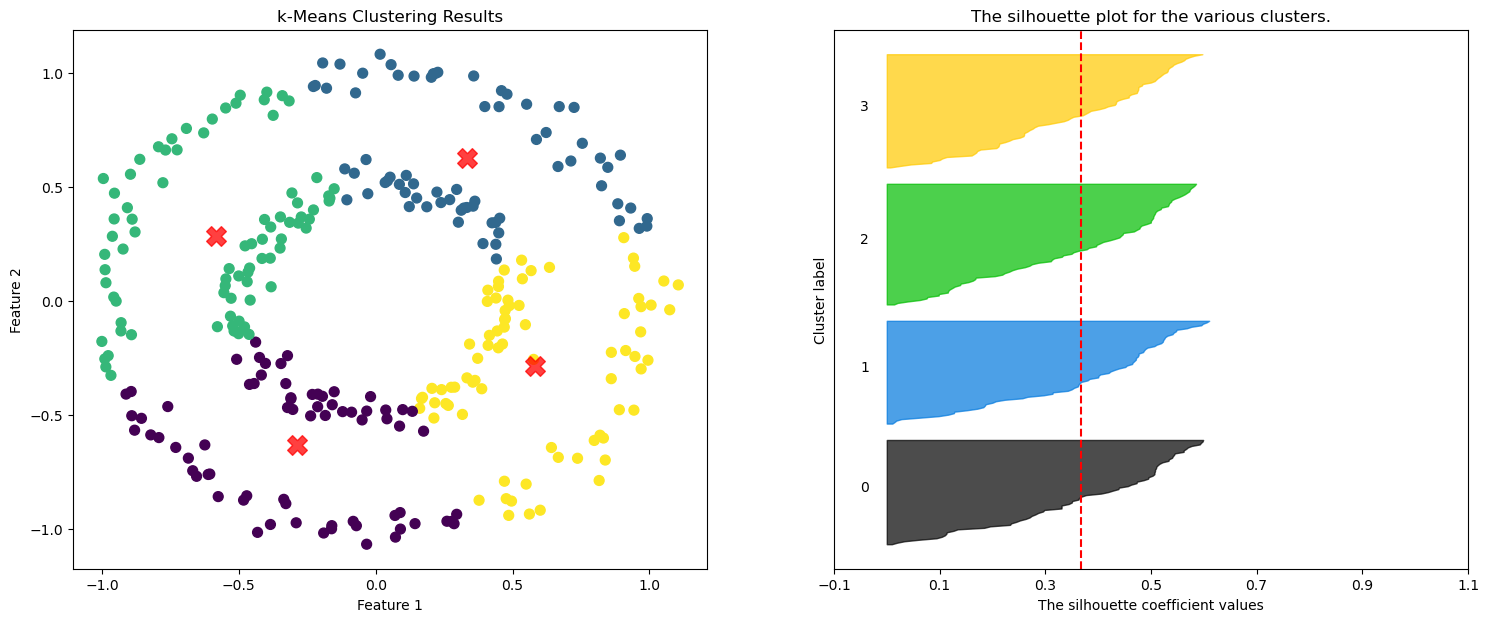

Agglomerative clustering silhouette Score: 0.3439793721989604


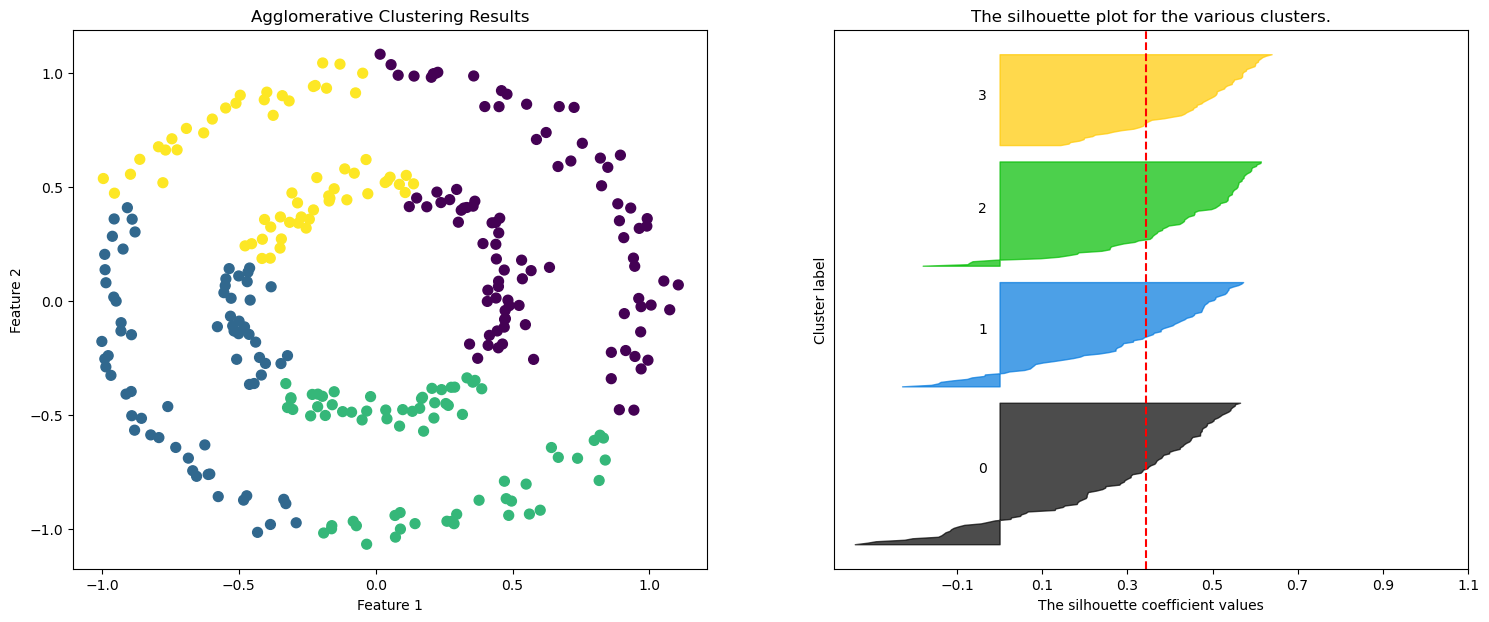

Number of clusters + noise: (2, 0)
DBSCAN silhouette score: 0.10931128921548665


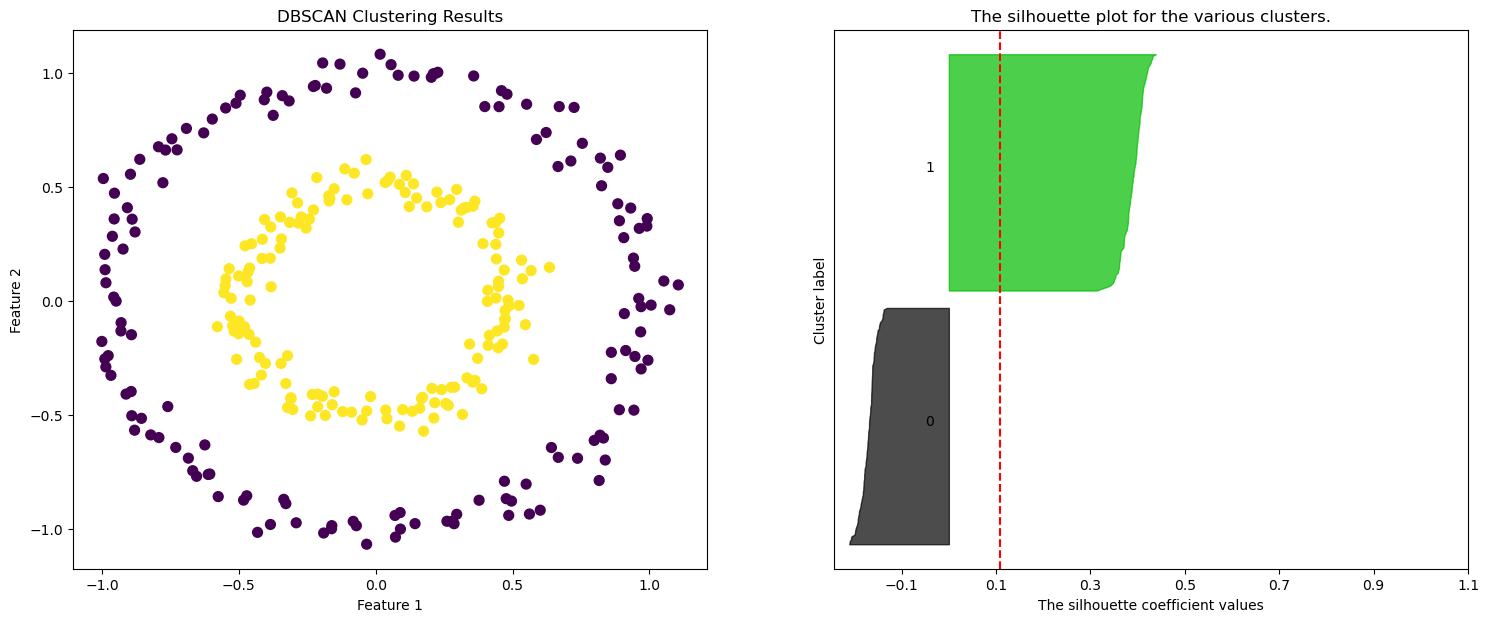

In [7]:
X_circle, y_circle = skd.make_circles(n_samples=300, factor=0.5, noise=0.05) 
# → Highlights DBSCAN's ability to handle non-linearly separable data.

# k-Means INITIALISE, FIT, PREDICT ==================
kmeans = KMeans(n_clusters=4, max_iter=14)
kmeans.fit(X_circle)
y_blob_kmeans = kmeans.predict(X_circle)
# Evaluate the model
silhouette_kmeans_avg = silhouette_score(X_circle, y_blob_kmeans)
print(f"k-Means silhouette Score: {silhouette_kmeans_avg}")

# Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
plot_clustering_results(X_circle, y_blob_kmeans, centers, silhouette_kmeans_avg, n_clusters=4,  title = 'k-Means Clustering Results')

# Agglomerative =======================================

#  INITIALISE, FIT, PREDICT
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X_circle)
# Evaluate the model
silhouette_agg_avg = silhouette_score(X_circle, y_agg)
print(f"Agglomerative clustering silhouette Score: {silhouette_agg_avg}")

# Plot the clustering results using the custom function
plot_clustering_results(X_circle, y_agg, None, silhouette_agg_avg, n_clusters=4,  title = 'Agglomerative Clustering Results')

# DBSCAN  ===========================================
dbscan = DBSCAN(eps=0.2, min_samples=7)
y_dbs = dbscan.fit_predict(X_circle)
labels=dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

silhouette_dbs_avg = silhouette_score(X_circle, y_dbs)
print(f"Number of clusters + noise: {n_clusters_, n_noise_}")
print(f"DBSCAN silhouette score: {silhouette_dbs_avg}")

plot_clustering_results(X_circle, y_dbs, None, silhouette_dbs_avg, n_clusters = n_clusters_,  title = 'DBSCAN Clustering Results')




📌 **When to Use Which?**  
- Use **k-Means** when you need fast, efficient clustering for large datasets with well-separated groups.  
- Use **Hierarchical Clustering** when you want to analyze **cluster relationships** and don't want to predefine `k`.  
- Use **DBSCAN** when you have abnormally shaped data and don't want to predefine `k`.